<a href="https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Parciales/Segundo%20Parcial/Aprendizaje%20no%20supervisado/D2(171).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo parcial (Aprendizaje no supervisado)
 <h3>Implementacion del clustering haciendo uso del algoritmo K-Means.<h3>
 <HR>
 <h3>
  NOMBRES:

  * POLO ORELLANA BRAYAN SIMON
  <br>
  CARRERA: INGENIERIA DE SISTEMAS
  <BR>
  FECHA: 04/06/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://drive.google.com/file/d/1GGbR8SYgps0AQw_05qd_x8e-MudvHgBz/view?usp=sharing)

 <h3>

Para el parcial hizo uso del dataset `covtype.csv` para aplpicar el modelo de **clustering** usando el algoritmo de **k-means**.

El enlace al dataset es [Forest Cover Type Dataset](https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset).

El archivo `covtype.csv` cuenta con un conjunto de datos que incluye información sobre el tipo de árbol, la cobertura de sombra, la distancia a puntos de referencia cercanos (carreteras, etc.), el tipo de suelo y la topografía local.

Este conjunto de datos contiene observaciones de árboles de cuatro áreas del Bosque Nacional Roosevelt en Colorado. ¡Todas las observaciones son variables cartográficas (sin teledetección) de secciones de bosque de 30 metros x 30 metros. Hay más de medio millón de mediciones en total!


# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados.

Antes con esta problemática se tenia dos alternativas:
* etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales)
* bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como:
* segmentación de clientes.
* análisis de datos.
* reducción de la dimensionalidad.
* detección de anomalías.
* aprendizaje semi-supervisado.
* motores de búsqueda.
* semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

#### Importamos las librerisa necesarias

In [ ]:
from sklearn.datasets import make_blobs #Para generar conjuntos de datos simulados con una distribución específica
import numpy as np #para el manejo de matrices y vectores

# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

import pandas as pd
#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split
%matplotlib inline

## K-Means para aprendizaje no supervisado.

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados.

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    # sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

### Carga del dataset

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

dataset = pd.read_csv('./MiningProcess_Flotation_Plant_Database.csv', delimiter=',')

dataset.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


Usamos el data.info() para ver los tipos de datos:

In [ ]:
# Drop date column
dataset = dataset.drop(['date'], axis=1)
dataset.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   % Iron Feed                   737453 non-null  object
 1   % Silica Feed                 737453 non-null  object
 2   Starch Flow                   737453 non-null  object
 3   Amina Flow                    737453 non-null  object
 4   Ore Pulp Flow                 737453 non-null  object
 5   Ore Pulp pH                   737453 non-null  object
 6   Ore Pulp Density              737453 non-null  object
 7   Flotation Column 01 Air Flow  737453 non-null  object
 8   Flotation Column 02 Air Flow  737453 non-null  object
 9   Flotation Column 03 Air Flow  737453 non-null  object
 10  Flotation Column 04 Air Flow  737453 non-null  object
 11  Flotation Column 05 Air Flow  737453 non-null  object
 12  Flotation Column 06 Air Flow  737453 non-null  object
 13 

Como podemos observar todos son de tipo Object, lo cual no nos ayudara al procesamiento del modelo, convertiremos todos los datos del dataset a un tipo de dato numerico:

In [ ]:
for dt in dataset.columns:
    dataset[dt]=dataset[dt].str.replace(',','.').astype(float)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

Verficamos que no exista valores nulos:

In [ ]:
dataset.isna().any()

% Iron Feed                     False
% Silica Feed                   False
Starch Flow                     False
Amina Flow                      False
Ore Pulp Flow                   False
Ore Pulp pH                     False
Ore Pulp Density                False
Flotation Column 01 Air Flow    False
Flotation Column 02 Air Flow    False
Flotation Column 03 Air Flow    False
Flotation Column 04 Air Flow    False
Flotation Column 05 Air Flow    False
Flotation Column 06 Air Flow    False
Flotation Column 07 Air Flow    False
Flotation Column 01 Level       False
Flotation Column 02 Level       False
Flotation Column 03 Level       False
Flotation Column 04 Level       False
Flotation Column 05 Level       False
Flotation Column 06 Level       False
Flotation Column 07 Level       False
% Iron Concentrate              False
% Silica Concentrate            False
dtype: bool

Se observa que todos los datos son de enteros, por lo tanto no se realiza ningun tipo de procesamiento de datos.

#### Normalizacion de las caracteristicas

In [ ]:
print("la cantidad total de datos: ", dataset.shape[0])

la cantidad total de datos:  737453


Como podemos observar en siguiente cuadro, se ve que el valor minimo y maximo en todos es demasiado diferente, para eso normalizaremos los datos, esto para que esten a una misma escala y el modelo pueda converger mejor:

In [ ]:
dataset.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [ ]:
dataset_norm, mu, sigma = featureNormalize(dataset)
dataset_norm.describe()

# dataset_norm = (dataset- dataset.min()) / (dataset.max() - dataset.min())
# dataset_norm.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,...,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05,7.374530e+05
mean,-6.748110e-15,-7.187778e-17,-1.234641e-16,-1.134638e-15,1.162801e-14,5.730953e-17,-3.707824e-15,-4.317138e-15,-1.078437e-15,-1.181802e-15,...,1.809971e-15,2.603016e-16,1.779115e-15,2.993353e-15,-1.170673e-15,-3.864828e-16,-1.829241e-15,-6.465725e-16,1.072740e-14,-2.985337e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.628038e+00,-1.959874e+00,-2.361037e+00,-2.701682e+00,-2.198955e+00,-2.620879e+00,-2.318592e+00,-3.532660e+00,-3.383291e+00,-3.663159e+00,...,-3.655129e+00,-2.831945e+00,-2.433563e+00,-2.685575e+00,-2.811937e+00,-3.055047e+00,-3.050227e+00,-2.893958e+00,-2.681879e+00,-1.534147e+00
25%,-7.027765e-01,-8.390409e-01,-6.524183e-01,-6.176522e-01,-3.416956e-01,-6.208640e-01,-4.775490e-01,-1.008426e+00,-8.856900e-01,-1.058447e+00,...,-1.201701e+00,-7.882071e-01,-6.301765e-01,-7.957175e-01,-6.933102e-01,-7.996462e-01,-7.950400e-01,-7.568400e-01,-6.079396e-01,-7.878468e-01
50%,-4.163433e-02,-1.177706e-01,1.228514e-01,1.781017e-01,1.722337e-01,7.870981e-02,2.486732e-01,6.479177e-01,6.322870e-01,6.167606e-01,...,2.879707e-01,-2.165161e-01,-2.082750e-01,-2.455195e-01,-9.093121e-02,-1.949318e-01,-5.871707e-02,-1.172819e-01,1.429695e-01,-2.903136e-01
75%,6.641010e-01,7.268942e-01,7.065400e-01,7.137122e-01,5.556445e-01,6.985952e-01,6.924355e-01,6.750941e-01,7.804495e-01,6.757978e-01,...,3.888772e-01,5.638230e-01,5.681307e-01,4.633743e-01,7.105885e-01,6.988438e-01,6.982136e-01,6.531138e-01,7.240302e-01,6.070233e-01
max,1.839034e+00,2.754090e+00,2.823470e+00,2.755585e+00,2.171455e+00,2.688481e+00,2.496366e+00,3.163914e+00,3.278083e+00,2.915571e+00,...,2.819599e+00,2.610614e+00,2.389650e+00,2.356566e+00,2.832832e+00,2.961969e+00,2.992583e+00,2.813956e+00,2.646000e+00,2.845923e+00


#### Calculo del numero de clusters

Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means* con, por ejemplos, 50 grupos.

en ``kmeans.fit_transform(X_train)`` transformamos X_train en una matriz de distancias a los centroides de los clústeres. X_digits_dist contendrá una matriz donde cada fila representará una instancia de X_train y cada columna representará la distancia de esa instancia a cada uno de los 50 centroides de los clústeres.

* la fila es la instancia de X_train.
* la columna es la distancia de esa instancia a cada centroide de los 50 clusteres.

#### Aplicacion del metodo de la silueta:

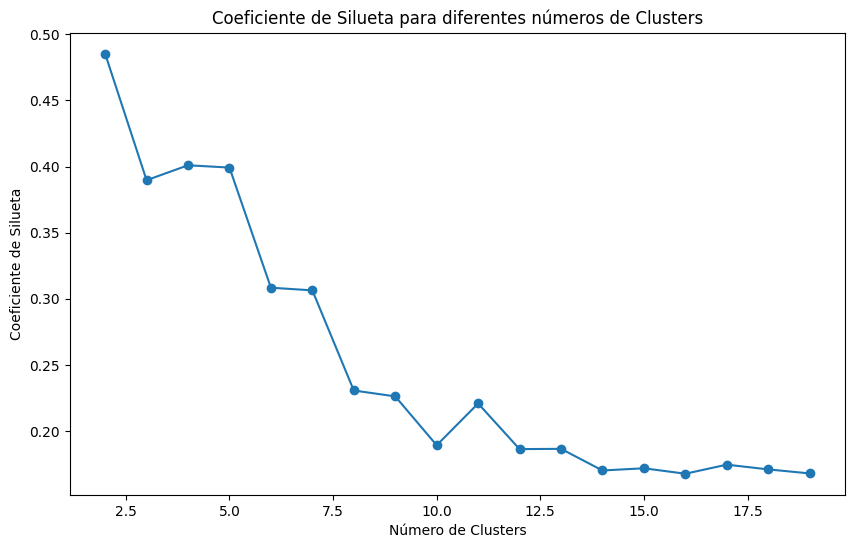

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(dataset_norm[:2000])
    score = silhouette_score(dataset_norm[:2000], labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
plt.show()

In [ ]:
max_score_idx = np.argmax(silhouette_scores) + 2
max_score = max(silhouette_scores)
print("El mejor valor de K es:", max_score_idx, "con coeficiente de silueta de:", max_score)

El mejor valor de K es: 2 con coeficiente de silueta de: 0.48531560686646774


#### Aplicacion del metodo del codo:

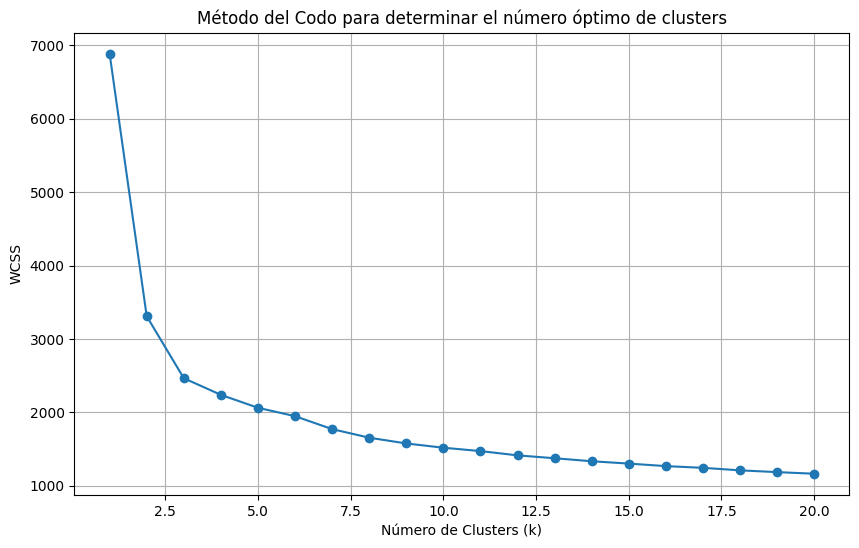

El número óptimo de clusters es: 4


In [ ]:
def optimal_number_of_clusters(X, max_k=20):
    wcss = []
    valores_k = list(range(1, max_k + 1))

    for k in valores_k:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Graficar WCSS
    plt.figure(figsize=(10, 6))
    plt.plot(valores_k, wcss, marker='o')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Método del Codo para determinar el número óptimo de clusters')
    plt.grid(True)
    plt.show()

    # Encontrar el punto de codo
    diff_wcss = np.diff(wcss)
    second_diff_wcss = np.diff(diff_wcss)
    optimal_k = np.argmin(second_diff_wcss)

    return optimal_k

# Uso de la función
optimal_k = optimal_number_of_clusters(dataset_norm[:2000], max_k=20)
print(f'El número óptimo de clusters es: {optimal_k}')

haciendo predicciones para ver a que grupo pertenece algunos datos insertados:

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

#nuestro k es 13
k1 = max_score_idx #-> del método de la silueta
k2 = optimal_k#-> del metodo del codo
valores_K = [k1, k2]
best_kmeans = None

for k in valores_K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_norm)
    print("k = ", k, "inertia = ", kmeans.inertia_)

    if (best_kmeans is None or
        kmeans.inertia_ < best_kmeans.inertia_):
        best_kmeans = kmeans

print("el mejor k es: ", best_kmeans.n_clusters)




k =  2 inertia =  13765220.35688967
k =  4 inertia =  11560403.035706325
el mejor k es:  4


In [ ]:

kmeans = best_kmeans

In [ ]:
for i in range(k):
    print("La cantidad de elementos en el grupo ",i," es de: ",len(kmeans.labels_[ kmeans.labels_ == i ]) )

La cantidad de elementos en el grupo  0  es de:  166056
La cantidad de elementos en el grupo  1  es de:  196504
La cantidad de elementos en el grupo  2  es de:  169378
La cantidad de elementos en el grupo  3  es de:  205515


In [ ]:

dataset['Cluster'] = kmeans.labels_
dataset.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Cluster
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31,2
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31,2
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31,2
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31,2


#### Visualizando los clusters que se formaron

Aqui aplicamos el analisis de componentes principales para darnos una idea de como se formaron los clusters, esto debido a que no podemos graficar todas las caracteristicas debido a su dimension.

Para esto usaremos y la libreria de `PCA`, para indicar que solo queremos los dos componentes principales.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(dataset_norm)

# Creamos un DataFrame con los dos valores de los componentes principales
pca_dataset_df = pd.DataFrame(data=pca_dataset, columns=['Componente_1', 'Componente_2'])
pca_nombres_df = pd.concat([pca_dataset_df, dataset['Cluster']], axis=1)

pca_nombres_df

,Componente_1,Componente_2,Cluster
0,2.100516,-0.066080,2
1,2.074616,0.103671,2
2,2.091499,0.356825,2
3,1.864286,0.531475,2
4,1.946396,0.549172,2
...,...,...,...
737448,-1.337790,-1.474455,3
737449,-0.521958,-0.862902,3
737450,-0.609746,-0.725859,3
737451,-1.296990,-1.050985,3


Graficando:

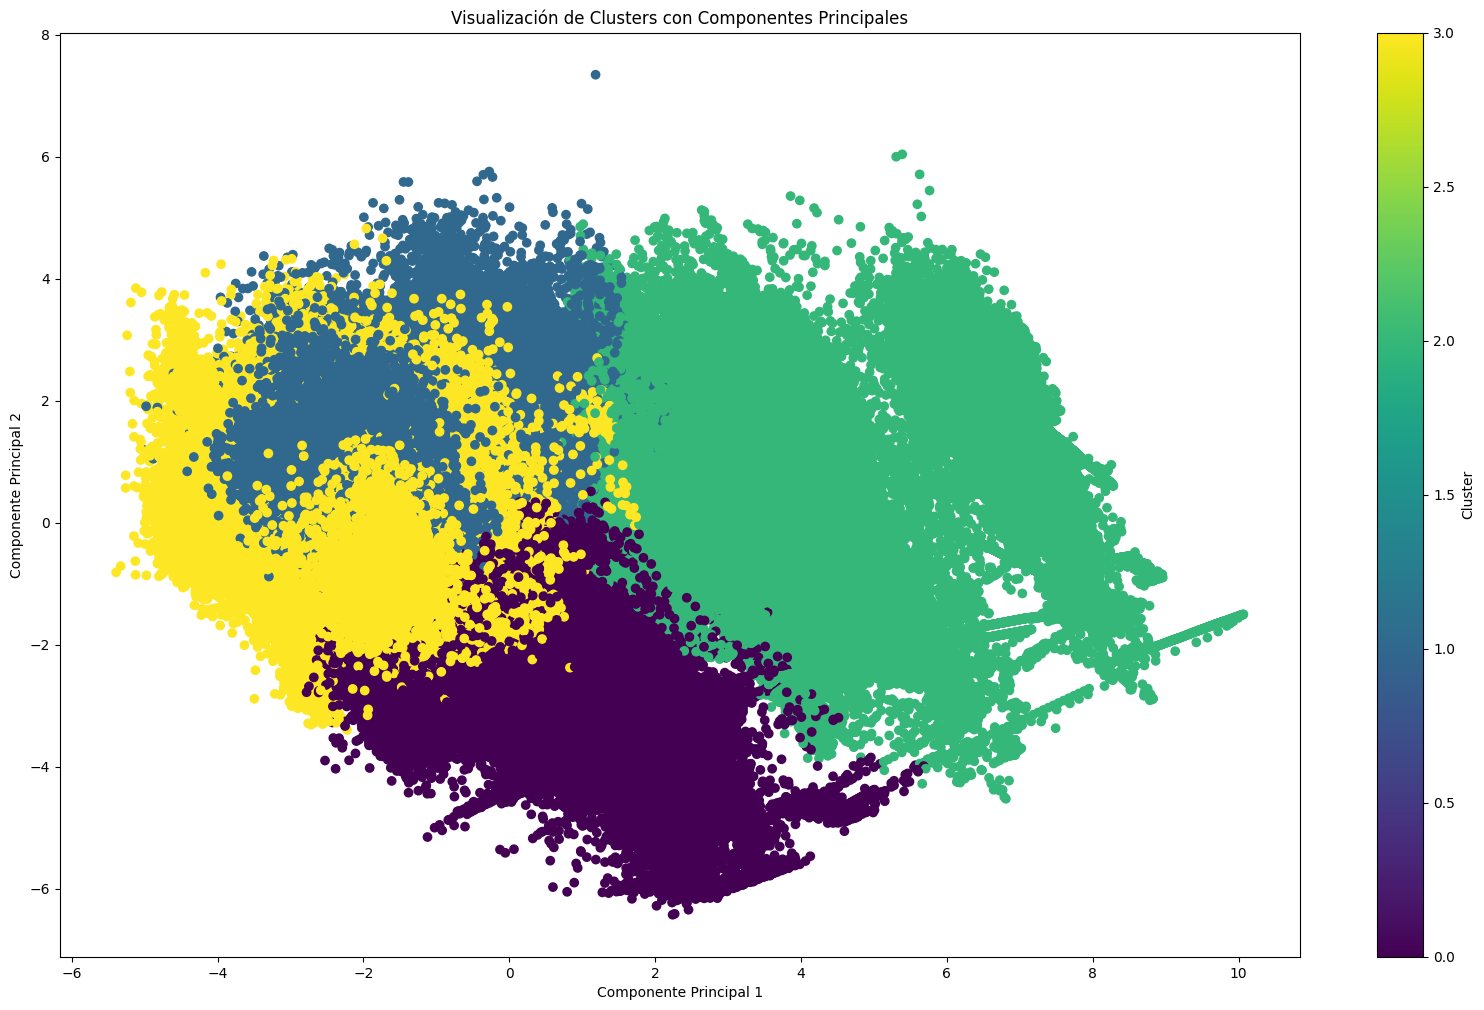

In [ ]:
plt.figure(figsize=(20, 12))  # Ajusta el tamaño de la figura según sea necesario
plt.scatter(pca_nombres_df['Componente_1'], pca_nombres_df['Componente_2'], c=pca_nombres_df['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters con Componentes Principales')
plt.colorbar(label='Cluster')
plt.show()
